**Dividing Data Into Training and Testing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


RMSE: 1303719.32
MAE: 1281300.18
MAPE: 98.26%
BIC: 489.24
  AIC: 487.35

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   20
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -241.677
Date:                Sat, 11 Jan 2025   AIC                            487.354
Time:                        12:34:52   BIC                            489.243
Sample:                             0   HQIC                           487.673
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5103      0.256     -1.994      0.046      -1.012      -0.009
sigma2      6.839e+09    3.1e-12   2.21e+21      0.000   

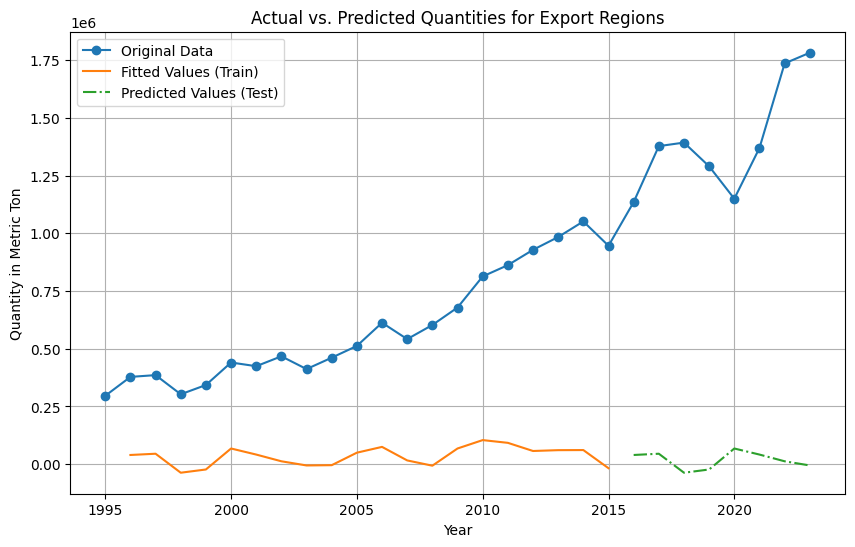

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


years = np.arange(1995, 2024)
data = {
    'Year': years,
    'Quantity': [296276, 378197, 385819, 302933, 343032, 440473, 424470, 467297,
                 412017, 461329, 512164, 612640, 541700, 602834, 678437, 813091,
                 862021, 928214, 983756, 1051244, 945893, 1134948, 1377244,
                 1392559, 1289651, 1149510, 1369264, 1735287, 1781601]
}
data = pd.DataFrame(data)

data.set_index('Year', inplace=True)
data_diff = data.diff().dropna()


train_data = data_diff.iloc[0:20]
test_data = data_diff.iloc[20:28]


model = ARIMA(train_data['Quantity'], order=(1, 1, 0))
model_fit = model.fit()


train_pred = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_pred = model_fit.predict(start=1, end=len(test_data), typ='levels')


train_pred.index = train_data.index
test_pred.index = test_data.index


actual_values = data['Quantity'].iloc[20:28]


residuals = actual_values - test_pred


rmse = np.sqrt(mean_squared_error(actual_values, test_pred))
mae = mean_absolute_error(actual_values, test_pred)


mape = np.mean(np.abs(residuals / (actual_values.replace(0, 1e-5)))) * 100
bic = model_fit.bic
aic = model_fit.aic

print(f"\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%\nBIC: {bic:.2f}\n  AIC: {aic:.2f}\n")
print(model_fit.summary())


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Quantity'], label='Original Data', marker='o')
plt.plot(train_pred.index, train_pred, label='Fitted Values (Train)', linestyle='-')
plt.plot(test_pred.index, test_pred, label='Predicted Values (Test)', linestyle='-.')
plt.title('Actual vs. Predicted Quantities for Export Regions')
plt.xlabel('Year')
plt.ylabel('Quantity in Metric Ton')
plt.legend()
plt.grid()
plt.show()


**Using the Entire Data for Training and Testing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


RMSE: 35976.56
MAE: 27867.34
MAPE: 3.50%
BIC: 738.57
  AIC: 735.91

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   29
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -365.954
Date:                Sat, 11 Jan 2025   AIC                            735.907
Time:                        12:34:52   BIC                            738.572
Sample:                             0   HQIC                           736.722
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2964      0.146      2.031      0.042       0.010       0.583
sigma2      1.365e+10   2.09e-12   6.54e+21      0.000    1.37

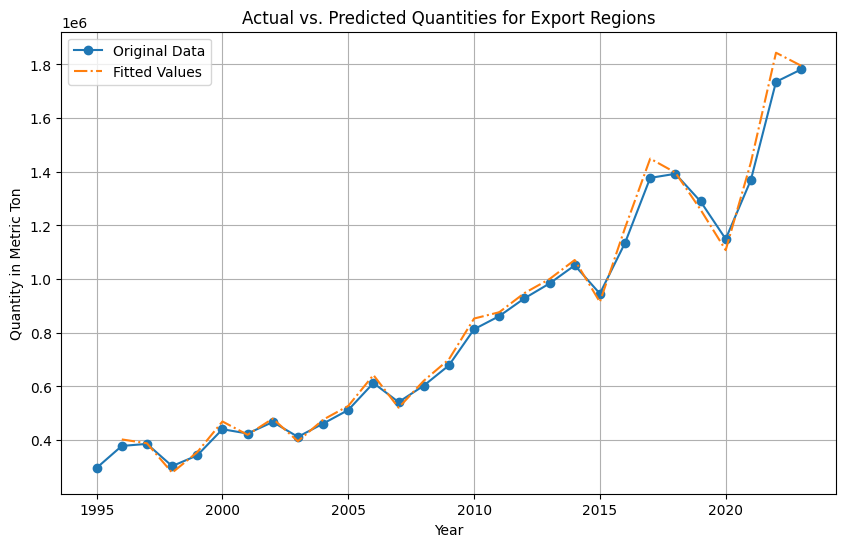

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle

years = np.arange(1995, 2024)
data = {
    'Year': years,
    'Quantity': [296276, 378197, 385819, 302933, 343032, 440473, 424470, 467297,
                 412017, 461329, 512164, 612640, 541700, 602834, 678437, 813091,
                 862021, 928214, 983756, 1051244, 945893, 1134948, 1377244,
                 1392559, 1289651, 1149510, 1369264, 1735287, 1781601]
}
data = pd.DataFrame(data)


data.set_index('Year', inplace=True)


data_diff = data.diff().dropna()


model = ARIMA(data['Quantity'], order=(1, 1, 0))
model_fit = model.fit()


pred = model_fit.predict(start=2, end=29 , typ='levels')
pred.index = data.index[1:]
actual_values = data['Quantity'].iloc[1:]

residuals = actual_values - pred


rmse = np.sqrt(mean_squared_error(actual_values, pred))
mae = mean_absolute_error(actual_values,pred)


mape = np.mean(np.abs(residuals / (actual_values.replace(0, 1e-10)))) * 100
aic = model_fit.aic
bic = model_fit.bic
print(f"\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%\nBIC: {bic:.2f}\n  AIC: {aic:.2f}\n")
print(model_fit.summary())


forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = np.arange(2024, 2024 + forecast_steps)


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Quantity'], label='Original Data', marker='o')
plt.plot(pred.index, pred, label='Fitted Values', linestyle='-.')
plt.title('Actual vs. Predicted Quantities for Export Regions')
plt.xlabel('Year')
plt.ylabel('Quantity in Metric Ton')
plt.legend()
plt.grid()
plt.show()
with open('arima_model.pkl', 'wb') as file:
  pickle.dump(model_fit, file)

**Function to be used for Deployment**

In [91]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle
pd.options.display.float_format = '{:,.0f}'.format
def prediction(x):
  if(x<2025 or x>2030):
    return " Please stick to the range"
  with open('arima_model.pkl', 'rb') as file:
    model_fit = pickle.load(file)
  forecast_steps = x-2023
  forecast = model_fit.forecast(steps=forecast_steps)
  forecast_years = np.arange(2024, 2024 + forecast_steps)
  forecast_arr=forecast.tolist()
  for i in range(0,len(forecast_arr)):
    print("Year {} Forecast {}".format(i+2024,forecast_arr[i]))

  years = np.arange(1995, 2024)
  data = pd.DataFrame({
     'Item': years,
     'Quantity':  [296276, 378197, 385819, 302933, 343032, 440473, 424470, 467297,
                 412017, 461329, 512164, 612640, 541700, 602834, 678437, 813091,
                 862021, 928214, 983756, 1051244, 945893, 1134948, 1377244,
                 1392559, 1289651, 1149510, 1369264, 1735287, 1781601]
})
  plt.plot(data['Item'],data['Quantity'],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(np.arange(2024,x+1),forecast,linestyle="-",label="Forecast Quantity from 2024 till {}".format(x))
  plt.title('Actual vs. Predicted Quantity for Export Regions')
  plt.xlim(1995,2030)
  plt.xlabel('Year')
  plt.ylabel('Export Quantity in Metric Ton')
  plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Year 2024 Forecast 1795329.5088297115
Year 2025 Forecast 1799398.9468978434
Year 2026 Forecast 1800605.2196544681
Year 2027 Forecast 1800962.7859668222


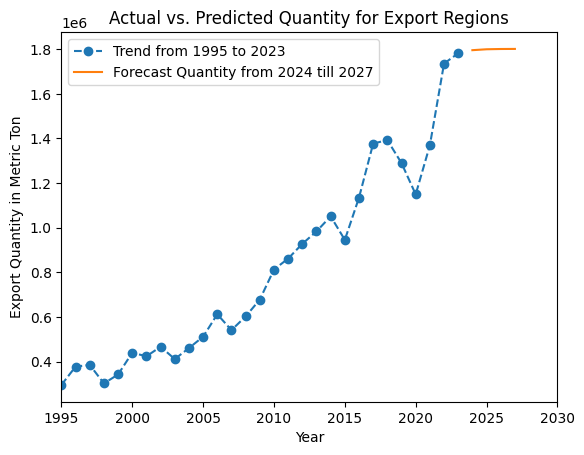

In [92]:
prediction(2027)